# Standardizaton

* What is Standardization?
    * Standardization is also called as **'z-Scaling'**.
    * It scales the data to mean of 0 and standard deviation of 1.
    * The distribution don't change after scaling becuase It has no effect on outliers.


* **Formula** : z  = (x - mean(x))/std(x)

* When to use :
    * When there is outliers in data, becuase is less affective on outliers.
    * we can use with algorithms which assumes normal distribution like logistic regression, linear regression, SVM.

# Demonstarting Standardization

In [34]:
# Exporting Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Importing dataset

houses = fetch_california_housing()

housing_data = pd.DataFrame(data = houses.data , columns = houses.feature_names)

In [36]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
df = housing_data[['MedInc','HouseAge']]  # Getting dataset with 2 features to compare easily.

In [38]:
df.head()

,MedInc,HouseAge
0,8.3252,41.0
1,8.3014,21.0
2,7.2574,52.0
3,5.6431,52.0
4,3.8462,52.0


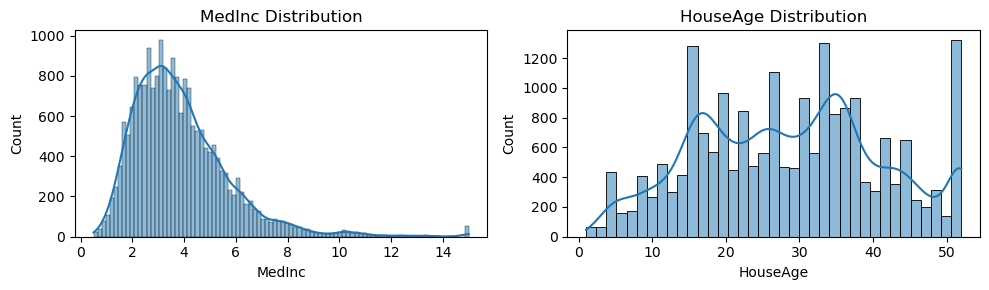

In [39]:
figure, axes = plt.subplots(1, 2, figsize = (10,3))

sns.histplot(data = df, x = df['MedInc'], kde = True, ax = axes[0])
axes[0].set_title("MedInc Distribution")

sns.histplot(data = df, x = df['HouseAge'], kde = True, ax = axes[1])
axes[1].set_title("HouseAge Distribution")

plt.tight_layout()
plt.show()

## Standard Scaling

In [40]:
# Importing StabdardScaler class from sklearn.preprocessing

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

In [41]:
# Fitting and Transforming the data

df_standard_scaled_array = standardScaler.fit_transform(df)

In [42]:
# The StandardScaler returns numpy array with scaled values, Converting to dataframe to visualize and compare

df_standard_scaled = pd.DataFrame(data = df_standard_scaled_array, columns = df.columns)

### Before Standardization

* we can see the **mean = 3.87** and **standard Debiation = 12.59**

In [43]:
np.round(df.describe(),2)

,MedInc,HouseAge
count,20640.00,20640.00
mean,3.87,28.64
std,1.90,12.59
min,0.50,1.00
25%,2.56,18.00
50%,3.53,29.00
75%,4.74,37.00
max,15.00,52.00


### After Standardization

* we can see **mean = 0** and **Standard Deviation = 1**. Becuase standard scaler scales the data to mean of 0 and std of 1.

In [44]:
np.round(df_standard_scaled.describe(),2)

,MedInc,HouseAge
count,20640.00,20640.00
mean,0.00,0.00
std,1.00,1.00
min,-1.77,-2.20
25%,-0.69,-0.85
50%,-0.18,0.03
75%,0.46,0.66
max,5.86,1.86


### Before Scaling and After Scaling - **Distributions**

* The Distributions are same after scaling and before scaling. Both the features are scaled without changing Distributions. 

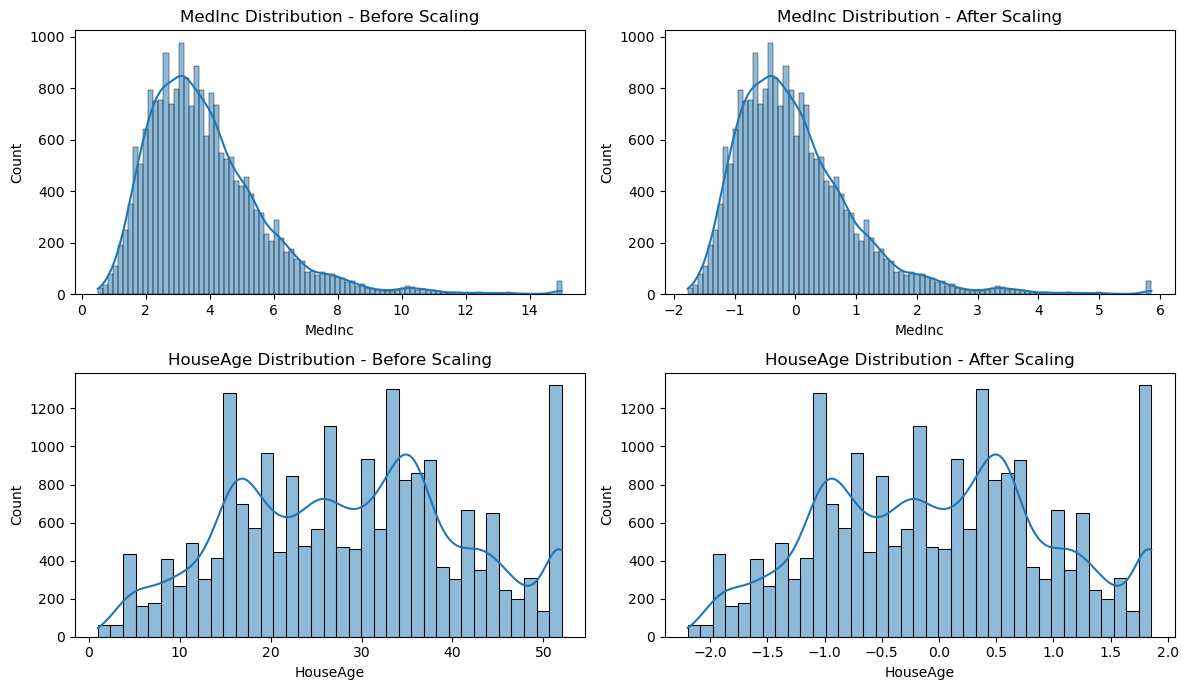

In [47]:
figure, axes = plt.subplots(2, 2, figsize = (12,7))

sns.histplot(data = df, x = df['MedInc'], kde = True, ax = axes[0,0])
axes[0,0].set_title("MedInc Distribution - Before Scaling")

sns.histplot(data = df, x = df_standard_scaled['MedInc'], kde = True, ax = axes[0,1])
axes[0,1].set_title("MedInc Distribution - After Scaling")

sns.histplot(data = df, x = df['HouseAge'], kde = True, ax = axes[1,0])
axes[1,0].set_title("HouseAge Distribution - Before Scaling")

sns.histplot(data = df, x = df_standard_scaled['HouseAge'], kde = True, ax = axes[1,1])
axes[1,1].set_title("HouseAge Distribution - After Scaling")

plt.tight_layout()
plt.show()

### Before scaling and after scaling - **outliers**

* We can see the scales are changed and the standard scaler doesn't have any affect on outliers. The data points are there where they before scaling.

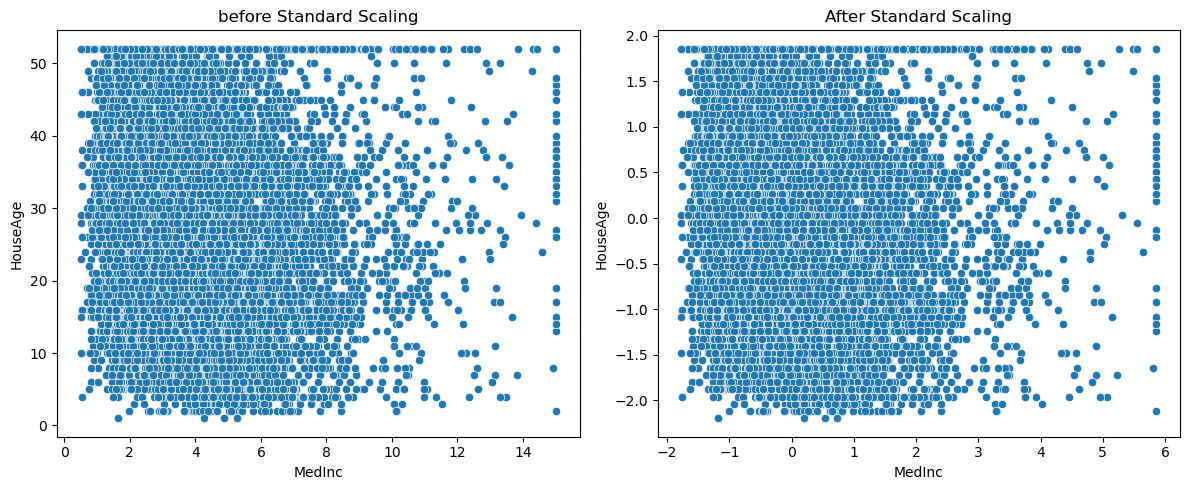

In [31]:
figure, axes = plt.subplots(1, 2, figsize = (12,5))

sns.scatterplot(data = df, x = df['MedInc'], y = df['HouseAge'], ax = axes[0])
axes[0].set_title("before Standard Scaling")

sns.scatterplot(data = df, x = df_standard_scaled['MedInc'], y = df_standard_scaled['HouseAge'], ax = axes[1])
axes[1].set_title("After Standard Scaling")

plt.tight_layout()
plt.show()